In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/Michael/Desktop/sreality_output_13052019.csv")

In [3]:
data.head(1)

,index,aukce,cena_aukce,lokalita,cena,cena_czk_value,cena_czk_unit,cena_czk_name,name,lat,...,typ_inzeratu,kategorie,podkategorie,s_userid,s_mobile,s_active,s_web,s_name,s_email,image
0,1000096092,False,0.0,"ulice Tyršova, Děčín - část obce Děčín I-Děčín",1,1,NaN,Celková cena,Prodej obchodního prostoru 1 383 m²,50.780903,...,prodej,komercni,obchodni prostory,82274.0,602974442.0,True,https://www.remaxeso.cz/,RE/MAX Eso,katerina.kotyzova@re-max.cz,https://d18-a.sdn.szn.cz/d_18/c_img_E_BI/v3qqX...


In [4]:
# We are going to see what data looks like
data.describe()

,index,cena_aukce,cena,cena_czk_value,lat,lon,hash,price_whole,price_recalculated,s_userid,s_mobile
count,5.976900e+04,5.976900e+04,5.976900e+04,5.976900e+04,59769.000000,59769.000000,5.976900e+04,5.408800e+04,1.845400e+04,59009.000000,5.899900e+04
mean,2.151101e+09,1.119390e+04,2.950667e+06,2.950667e+06,49.866166,15.343500,2.151101e+09,8.812985e+06,9.510605e+03,55635.180227,6.740549e+08
std,1.242095e+09,4.115669e+05,2.067613e+07,2.067613e+07,0.467330,1.555420,1.242095e+09,1.249993e+09,3.387385e+05,30932.923970,1.566348e+08
min,3.644400e+04,0.000000e+00,1.000000e+00,1.000000e+00,48.615200,12.163219,3.644400e+04,1.000000e+00,1.000000e+00,266.000000,1.702400e+04
25%,1.076727e+09,0.000000e+00,1.700000e+04,1.700000e+04,49.576118,14.371387,1.076727e+09,3.740000e+04,1.470000e+02,21098.000000,6.043418e+08
50%,2.152374e+09,0.000000e+00,1.070000e+06,1.070000e+06,49.997047,14.620621,2.152374e+09,1.485000e+06,3.854750e+02,66570.000000,7.329097e+08
75%,3.230421e+09,0.000000e+00,3.630000e+06,3.630000e+06,50.110455,16.610714,3.230421e+09,3.960000e+06,1.563750e+03,83705.000000,7.772247e+08
max,4.294819e+09,4.860400e+07,3.317330e+09,3.317330e+09,51.025295,18.833136,4.294819e+09,2.903713e+11,3.001533e+07,92777.000000,9.727419e+08


In [5]:
# let's see columns:
data.columns

Index(['index', 'aukce', 'cena_aukce', 'lokalita', 'cena', 'cena_czk_value',
       'cena_czk_unit', 'cena_czk_name', 'name', 'lat', 'lon', 'hash',
       'urlSreality', 'linkdetail', 'download_date', 'description', 'geometry',
       'locality_typ', 'locality_value', 'text', 'price_whole', 'price_freq',
       'price_recalculated', 'price_recalculated_perunit', 'typ_inzeratu',
       'kategorie', 'podkategorie', 's_userid', 's_mobile', 's_active',
       's_web', 's_name', 's_email', 'image'],
      dtype='object')

In [6]:
# we explored ambigious variables:
data.count()

index                         59769
aukce                         59769
cena_aukce                    59769
lokalita                      59769
cena                          59769
cena_czk_value                59769
cena_czk_unit                 18759
cena_czk_name                 59769
name                          59611
lat                           59769
lon                           59769
hash                          59769
urlSreality                   59769
linkdetail                    59769
download_date                 59769
description                   59611
geometry                      59606
locality_typ                  59611
locality_value                59611
text                          59611
price_whole                   54088
price_freq                    16804
price_recalculated            18454
price_recalculated_perunit    18454
typ_inzeratu                  59611
kategorie                     59611
podkategorie                  59611
s_userid                    

In [7]:
data.groupby("cena_czk_name").size() #ok

cena_czk_name
Celková cena    59769
dtype: int64

In [8]:
data.groupby("cena_czk_unit").size() # 18759 "za měsíc" or NaN

cena_czk_unit
za měsíc    18759
dtype: int64

In [9]:
# We drop na for data where cathegory is missing - only 0.2% of data.
data_clean = data.dropna(subset=['kategorie', 'podkategorie'])

In [10]:
# Let's see cathegories for future visualization
data_clean.groupby("podkategorie").size()

podkategorie
1+1                     1507
1+kk                    2559
2+1                     3704
2+kk                    5201
3+1                     3994
3+kk                    3596
4+1                      807
4+kk                    1236
5+1                      133
5+kk                     219
6 a vice                  89
atypicky                 108
bydleni                 5233
chalupa                  683
chata                   1409
cinzovni dum             493
garaz                    446
garazove stani           216
kancelare               4282
komercni                 658
lesy                     376
louky                    363
mobilheim                  7
na klic                  319
obchodni prostory       3038
ostatni                 1397
pamatka/jine              66
pole                    1076
pudni prostor              8
restaurace               650
rodinny                10787
rybniky                   20
sady/vinice               31
sklady                  2016
u

In [11]:
#drop auction due to their unrealistic values
noaukce = data_clean[data.aukce == 0]

/Users/Michael/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [12]:
# drop weird prices (i.e. price 1czk and also drop extremely large values (they imply misleading histograms... we will use data up to 99 percentile of price))

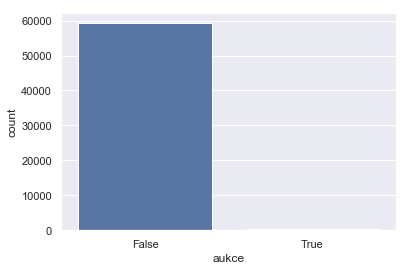

In [13]:
sns.set(style="darkgrid")
ax = sns.countplot(x="aukce", data=data_clean)

In [14]:
data_clean[["typ_inzeratu","aukce"]].groupby("aukce").count()

,typ_inzeratu
aukce,
False,59237
True,374


# Ratio of sales and rents

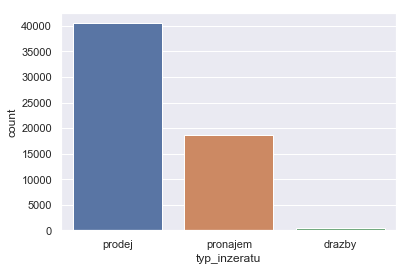

In [15]:
sns.set(style="darkgrid")
ax = sns.countplot(x="typ_inzeratu", data=data_clean)

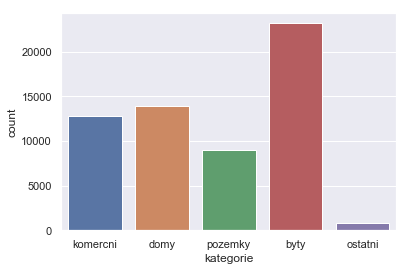

In [16]:
sns.set(style="darkgrid")
ax = sns.countplot(x="kategorie", data=data_clean)

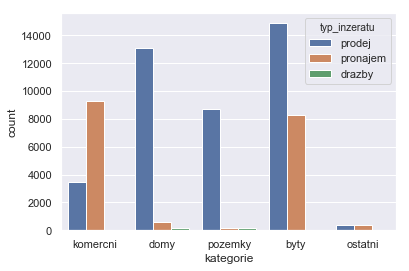

In [17]:
sns.set(style="darkgrid")
ax = sns.countplot(x="kategorie", data=data_clean, hue="typ_inzeratu")

/Users/Michael/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


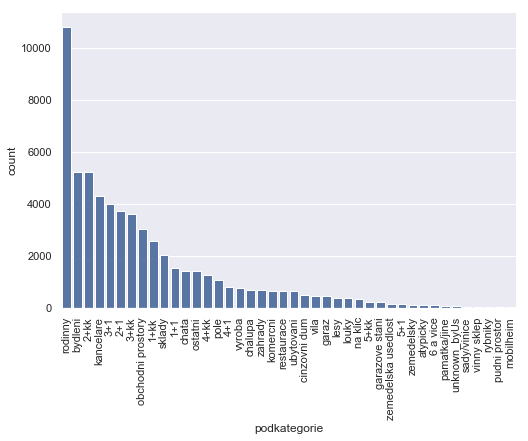

In [18]:
g = sns.factorplot("podkategorie", data=data_clean, 
                   aspect=1.5, kind="count", color="b",
                  order = data_clean['podkategorie'].value_counts().index)
g.set_xticklabels(rotation=90)

Some prices are weird (i.e. 1CZK). We believe its dohodou... 


In [19]:
data_clean["flag_1CZK"] = data_clean.cena == 1

/Users/Michael/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
#number of 1CZK listing
sum(data_clean.flag_1CZK == 1)

5524

In [21]:
#number of 1czk by prodej and pronajem
data_clean[["typ_inzeratu", "flag_1CZK", "cena"]].groupby([ "typ_inzeratu", "flag_1CZK"]).count()

cena
typ_inzeratu flag_1CZK       
drazby       False        374
prodej       False      36908
             True        3635
pronajem     False      16805
             True        1889

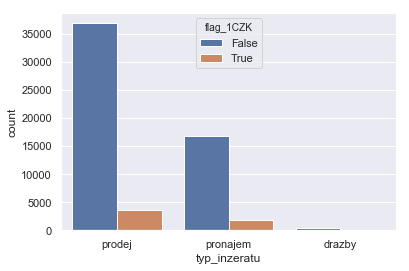

In [22]:
sns.set(style="darkgrid")
ax = sns.countplot(x="typ_inzeratu", data=data_clean, hue="flag_1CZK")

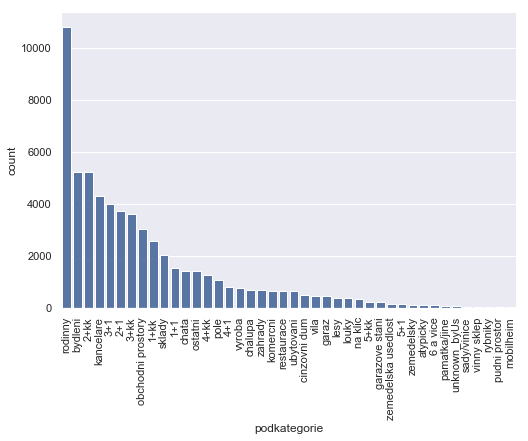

In [23]:
# frequent real estate agency
g = sns.factorplot("podkategorie", data=data_clean, 
                   aspect=1.5, kind="count", color="b",
                  order = data_clean['podkategorie'].value_counts().index)
g.set_xticklabels(rotation=90)

In [26]:
# frequent real estate agency
#select top 10 agencies
d = data_clean.groupby("s_name").count()["index"].sort_values(ascending=False)[0:20]

In [27]:
dd = pd.DataFrame(d)

In [31]:
dd.head()

,index
s_name,
M&M reality,6622
Bidli,1208
"Realitní kancelář STING, s.r.o.",897
NEXT REALITY,706
OK Realitní služby,680


In [36]:
data_clean_sub = data_clean[data_clean.s_name.isin(dd.index)]

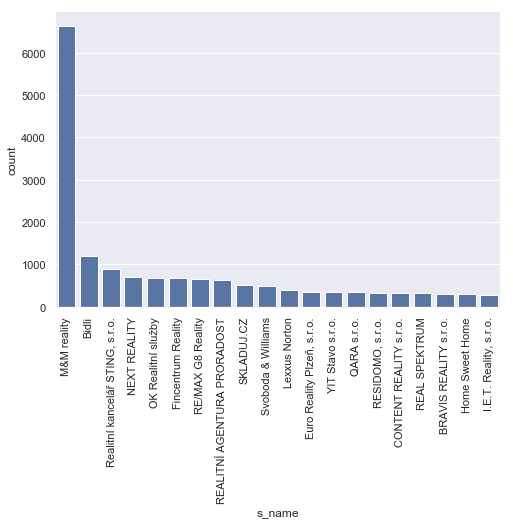

In [42]:
# frequent real estate agency
g = sns.factorplot("s_name", data=data_clean_sub, 
                   aspect=1.5, kind="count", color="b",
                  order = data_clean_sub['s_name'].value_counts().index)

g.set_xticklabels(rotation=90)

### select non-auction data and price that is not dohodou

In [ ]:
noaukce_data_tmp = noaukce_data[noaukce_data.cena < np.percentile(noaukce_data.cena, 99)]
noaukce_data_clean = noaukce_data_tmp[noaukce_data_tmp.cena > 1]

In [500]:
noaukce_data_clean.cena.describe()

count    5.326300e+04
mean     2.702749e+06
std      3.633692e+06
min      2.500000e+01
25%      3.500000e+04
50%      1.450000e+06
75%      3.890000e+06
max      2.397550e+07
Name: cena, dtype: float64

## Chci - 2 grafy -> histogram s cenama. + vedle cummulative graf


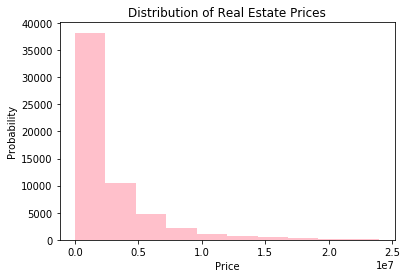

In [401]:


x = noaukce_data_clean.cena

plt.hist(x, bins=10, facecolor='pink', alpha=1)
plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('Distribution of Real Estate Prices')
plt.show()

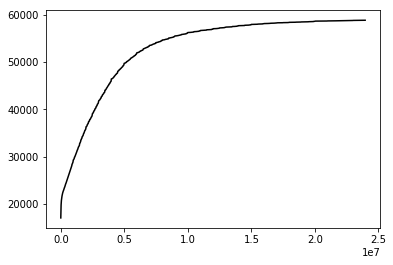

In [405]:
values, base = np.histogram(x, bins=1000)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='black')
plt.show()

In [525]:
data_clean.groupby("s_name").size()

s_name
"Agentura REPRE"                                 4
1. Chodská realitní kancelář v.o.s.             22
1. Nonstop Reality                              35
1. Real - Invest, s.r.o.                         6
1. Slezská realitní, s.r.o.                      2
1. Staroměstská realitní                         2
1. Zbraslavská realitní kancelář                10
1. opavská realitka, s.r.o.                     44
100 DIRECT s.r.o.                                7
108 AGENCY, s.r.o.                               2
1JMREALITY - Jan Maroušek                        7
3D Organization, s.r.o.                          4
3E PROJEKT, a.s.                                 5
3K Capital, s.r.o.                               1
3KB7 CZ, s.r.o.                                  3
4 DEVELOP                                       13
7k-REALITY, s.r.o.                               2
7team investment s.r.o.                          1
A - Trading, a.s.                                9
A V A L S T A V, s.r.o. 